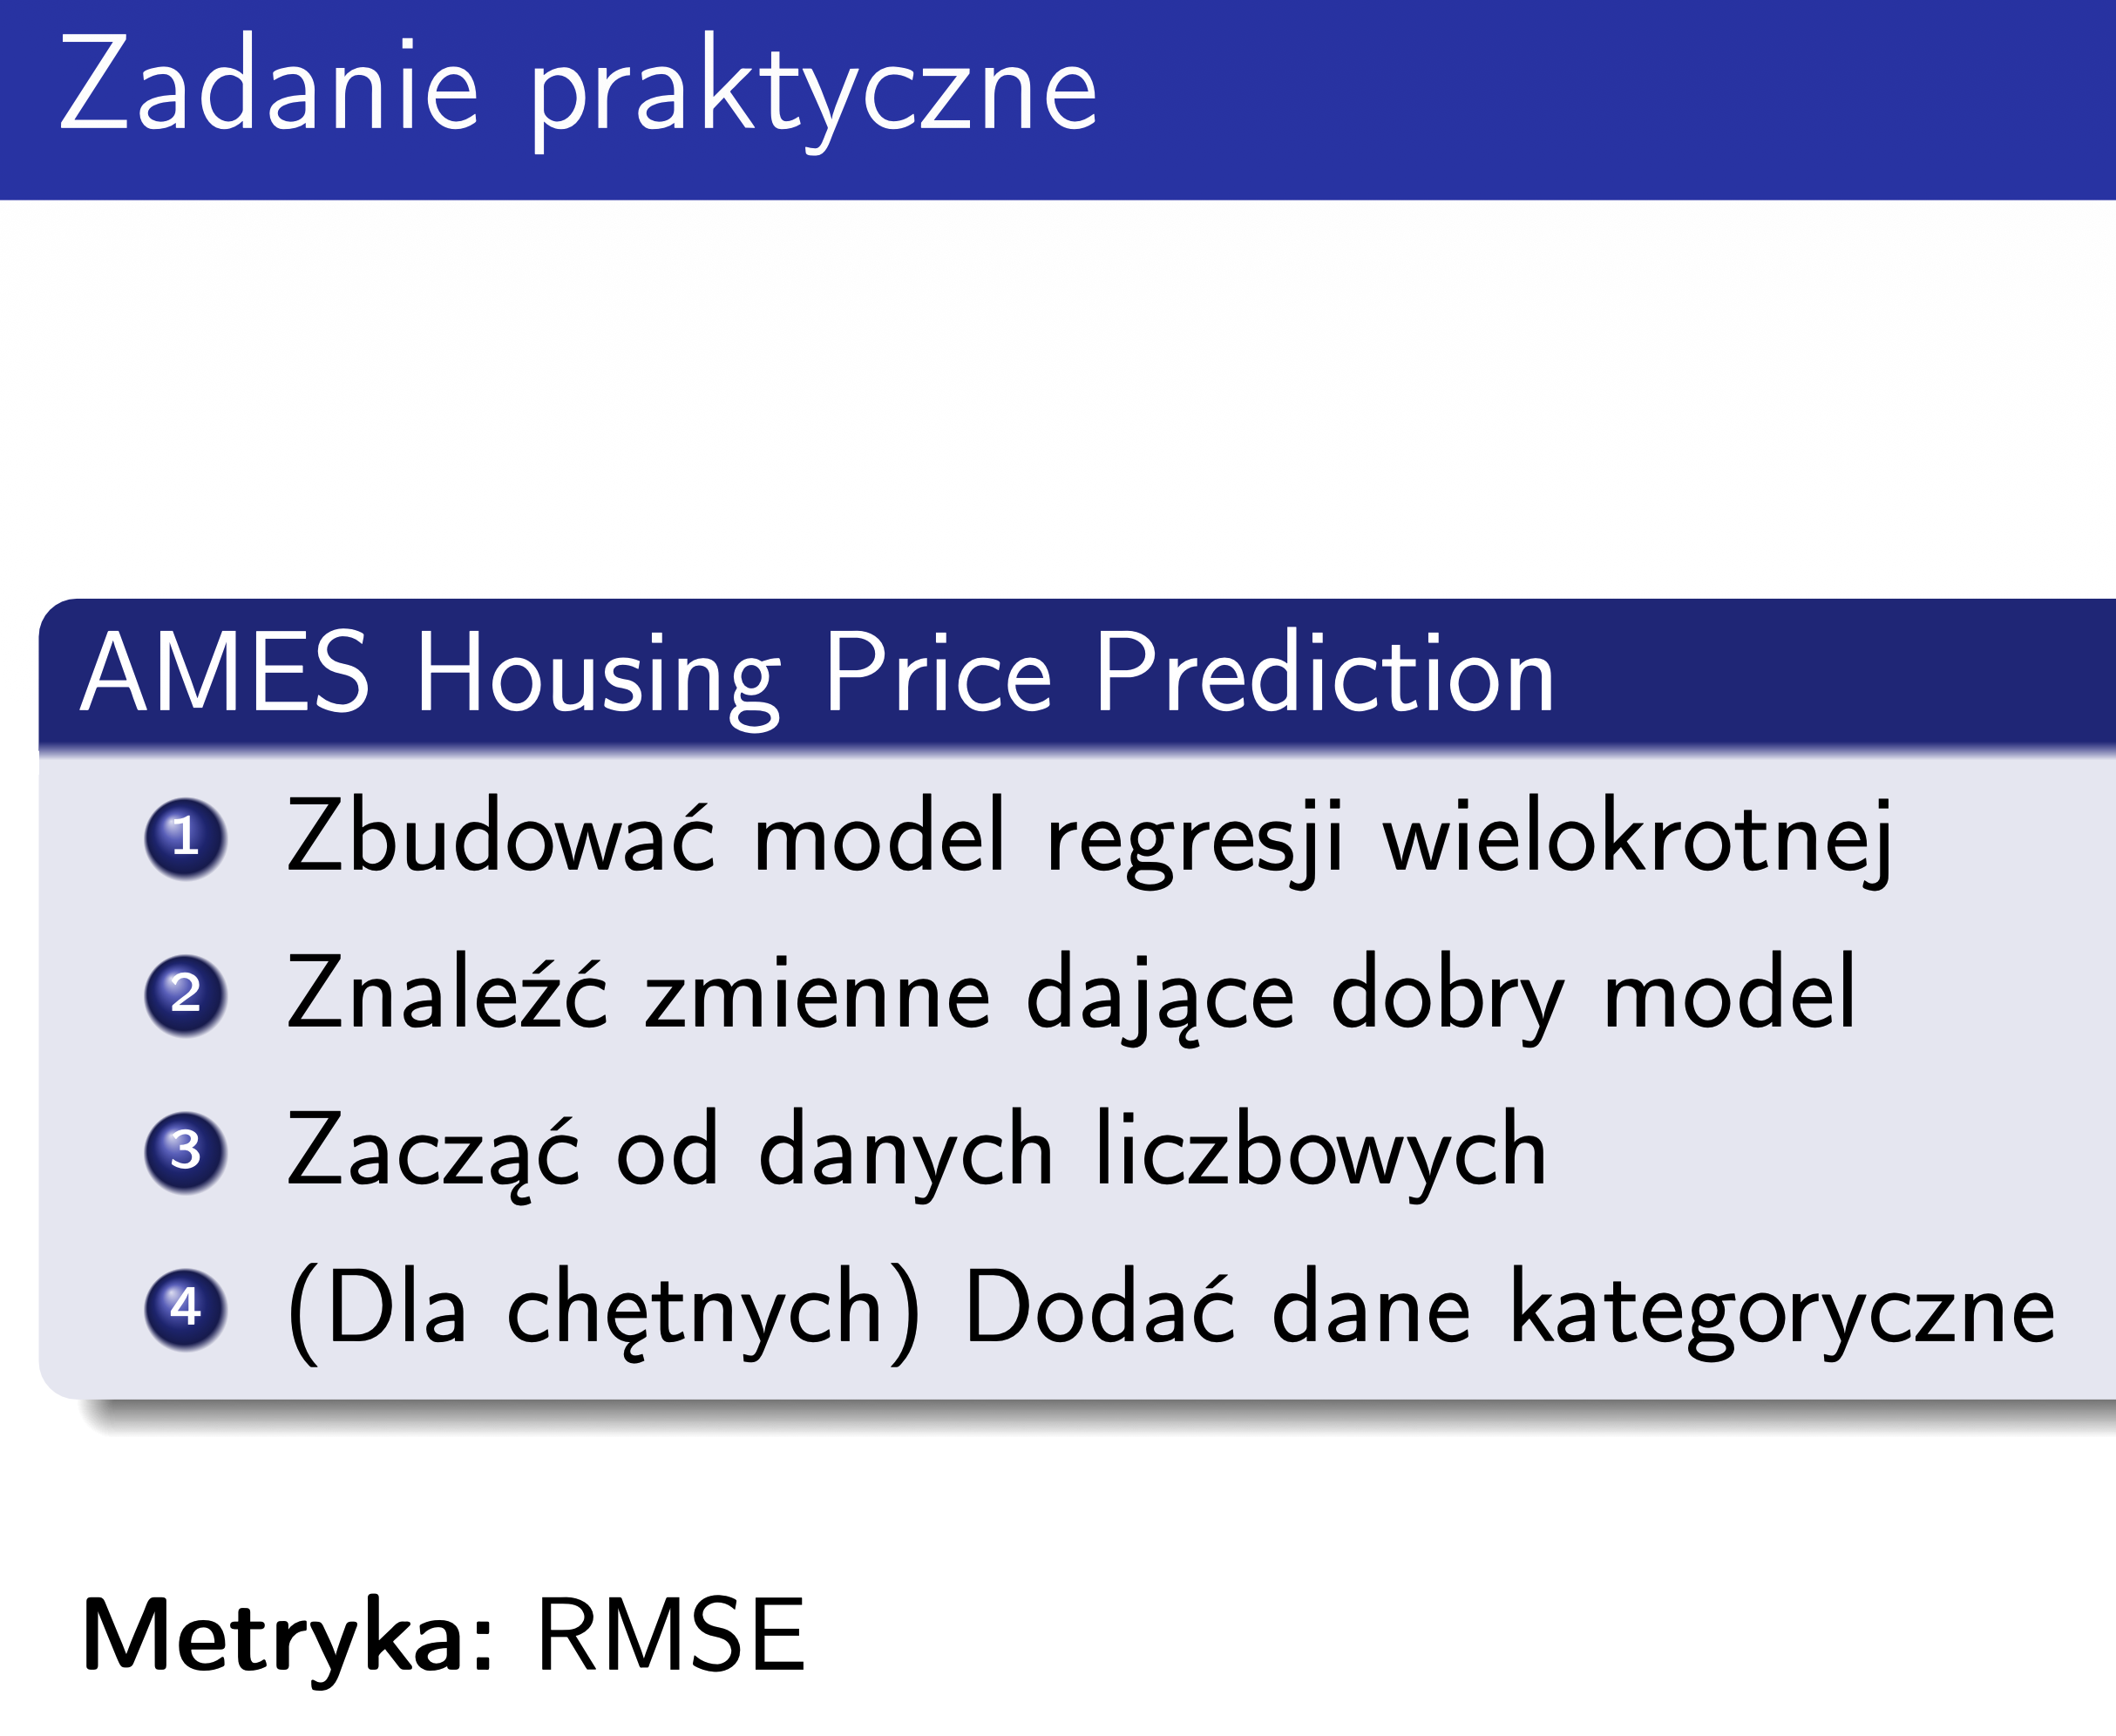

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

df_housing = pd.read_csv('AMES_housing_Price.csv')

#Wybranie danych liczbowych
df_numeric = df_housing.copy()
df_numeric = df_numeric.drop('Id', axis=1)
numerical_cols = df_numeric.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_numeric[numerical_cols]

#Identyfikacja brakujących wartości
missing_values_numeric = df_numeric.isnull().sum()
missing_values_numeric = missing_values_numeric[missing_values_numeric > 0].sort_values(ascending=False)

#Uzupełnienie brakujących wartości za pomocą mediany
for col in missing_values_numeric.index:
    median_val = df_numeric[col].median()
    df_numeric[col] = df_numeric[col].fillna(median_val)

#Obliczenie korelacji między kolumnami, wybranie korelacji między kolumną SalePrice a pozostałymi
correlation_matrix = df_numeric.corr()
sale_price_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)

#Wybranie tylko tych kolumn dla których korelacja z SalesPrice jest większa niż 0.5
highly_correlated_features = sale_price_correlation[abs(sale_price_correlation) > 0.5].index.tolist()
highly_correlated_features.remove('SalePrice')

#Podział zbiotu na dane treningowe i testowe w proporcji 80%/20%
X = df_numeric[highly_correlated_features]
y = df_numeric['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#Obliczenie RMSE dla zbioru testowego
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'RMSE: {rmse:.2f}$')

RMSE: 33569.68$
